In [ ]:
# Modules
from matplotlib.image import imread
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


from warnings import filterwarnings


from google.colab import drive
import warnings

warnings.filterwarnings('ignore')
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:

# Import the data
df = pd.read_csv("/content/gdrive/MyDrive/OLD_data_eeg_in_csv.csv")

df.head()


,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2,label
0,0.949867,-0.412790,-0.322089,0.751464,1.817943,1.433026,0.689987,-1.054576,-0.381360,-0.237432,0.610876,0.807887,-0.387744,0.836812,0.031605,0.180892,0.713202,Biscuit
1,-1.438008,-0.619738,-1.026245,-0.856272,-0.683106,-0.478521,0.074579,-1.367111,-0.474807,-0.182218,-0.561408,-1.596942,-1.876672,0.168698,-0.243984,0.033856,-1.331574,Biscuit
2,-1.473790,-0.968607,-1.147936,0.967766,0.324674,0.510022,0.345058,-0.929844,-0.844814,-0.824933,-0.936504,-0.546616,-0.033366,0.165388,-0.772637,-0.966099,0.024178,Biscuit
3,-0.172934,1.165387,1.207597,1.366681,0.932849,0.162062,-0.569059,-0.857833,0.891493,1.323472,0.894634,0.554903,-0.872456,-0.683542,-0.588627,-2.013185,-1.028050,Biscuit
4,0.367294,0.017011,-1.681696,-0.910858,-0.515992,-0.315080,0.925285,-0.210909,0.425723,0.070810,-1.161866,1.156145,-0.034877,0.933107,-0.123902,1.200219,0.547526,Biscuit


In [ ]:
df.shape
#160 row, 18 columns 

(160, 18)

In [ ]:
col_names = df.columns

col_names

Index(['Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'P1', 'P5', 'PO7',
       'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'label'],
      dtype='object')

In [ ]:
# check distribution of target_class column
df['label'].value_counts()

Biscuit    40
Bed        40
Drink      40
Toilet     40
Name: label, dtype: int64

In [ ]:
# view the percentage distribution of target_class column
df['label'].value_counts()/np.float(len(df))

Biscuit    0.25
Bed        0.25
Drink      0.25
Toilet     0.25
Name: label, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pz      160 non-null    float64
 1   P3      160 non-null    float64
 2   P7      160 non-null    float64
 3   O1      160 non-null    float64
 4   Oz      160 non-null    float64
 5   O2      160 non-null    float64
 6   P4      160 non-null    float64
 7   P8      160 non-null    float64
 8   P1      160 non-null    float64
 9   P5      160 non-null    float64
 10  PO7     160 non-null    float64
 11  PO3     160 non-null    float64
 12  POz     160 non-null    float64
 13  PO4     160 non-null    float64
 14  PO8     160 non-null    float64
 15  P6      160 non-null    float64
 16  P2      160 non-null    float64
 17  label   160 non-null    object 
dtypes: float64(17), object(1)
memory usage: 22.6+ KB


In [ ]:
# check for missing values in variables
df.isnull().sum()

Pz       0
P3       0
P7       0
O1       0
Oz       0
O2       0
P4       0
P8       0
P1       0
P5       0
PO7      0
PO3      0
POz      0
PO4      0
PO8      0
P6       0
P2       0
label    0
dtype: int64

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2
count,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00
mean,0.18,-0.21,-0.25,-0.12,0.19,0.10,-0.01,-0.10,0.08,-0.27,-0.24,-0.06,0.25,0.02,-0.13,-0.09,0.10
std,0.99,0.95,1.61,0.88,0.91,0.90,0.81,1.01,0.97,1.00,0.83,0.87,1.02,0.87,0.91,0.91,0.84
min,-2.69,-2.95,-18.80,-3.05,-2.55,-2.20,-2.88,-3.30,-3.68,-3.34,-3.07,-2.61,-2.38,-2.26,-2.41,-2.42,-1.79
25%,-0.38,-0.91,-0.30,-0.64,-0.46,-0.46,-0.51,-0.71,-0.37,-0.93,-0.77,-0.64,-0.46,-0.55,-0.66,-0.68,-0.53
50%,0.18,-0.21,-0.06,-0.17,0.27,0.08,-0.03,-0.09,0.10,-0.26,-0.30,-0.12,0.22,-0.05,-0.17,-0.09,0.05
75%,0.79,0.46,0.09,0.49,0.81,0.60,0.54,0.55,0.64,0.39,0.24,0.60,1.03,0.60,0.38,0.49,0.57
max,2.58,2.09,2.23,2.32,2.98,2.79,1.63,3.57,3.03,2.55,1.88,2.13,2.75,2.54,2.60,2.26,4.63


Text(0, 0.5, 'P8')

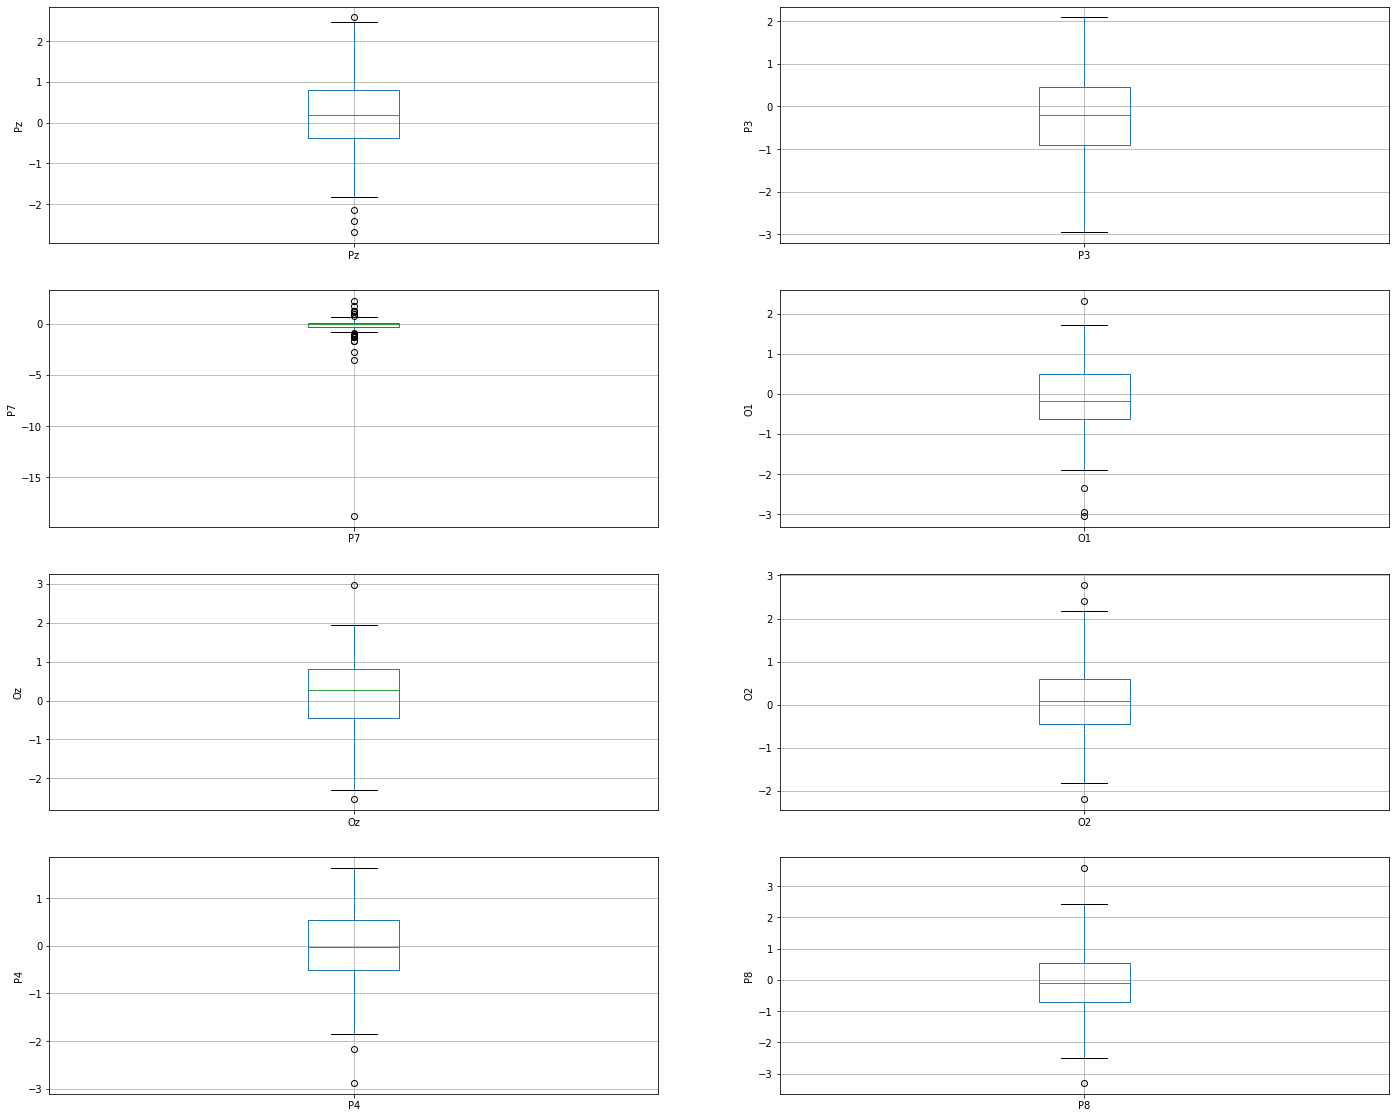

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Pz')
fig.set_title('')
fig.set_ylabel('Pz')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='P3')
fig.set_title('')
fig.set_ylabel('P3')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='P7')
fig.set_title('')
fig.set_ylabel('P7')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='O1')
fig.set_title('')
fig.set_ylabel('O1')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Oz')
fig.set_title('')
fig.set_ylabel('Oz')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='O2')
fig.set_title('')
fig.set_ylabel('O2')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='P4')
fig.set_title('')
fig.set_ylabel('P4')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='P8')
fig.set_title('')
fig.set_ylabel('P8')


Text(0, 0.5, 'P6')

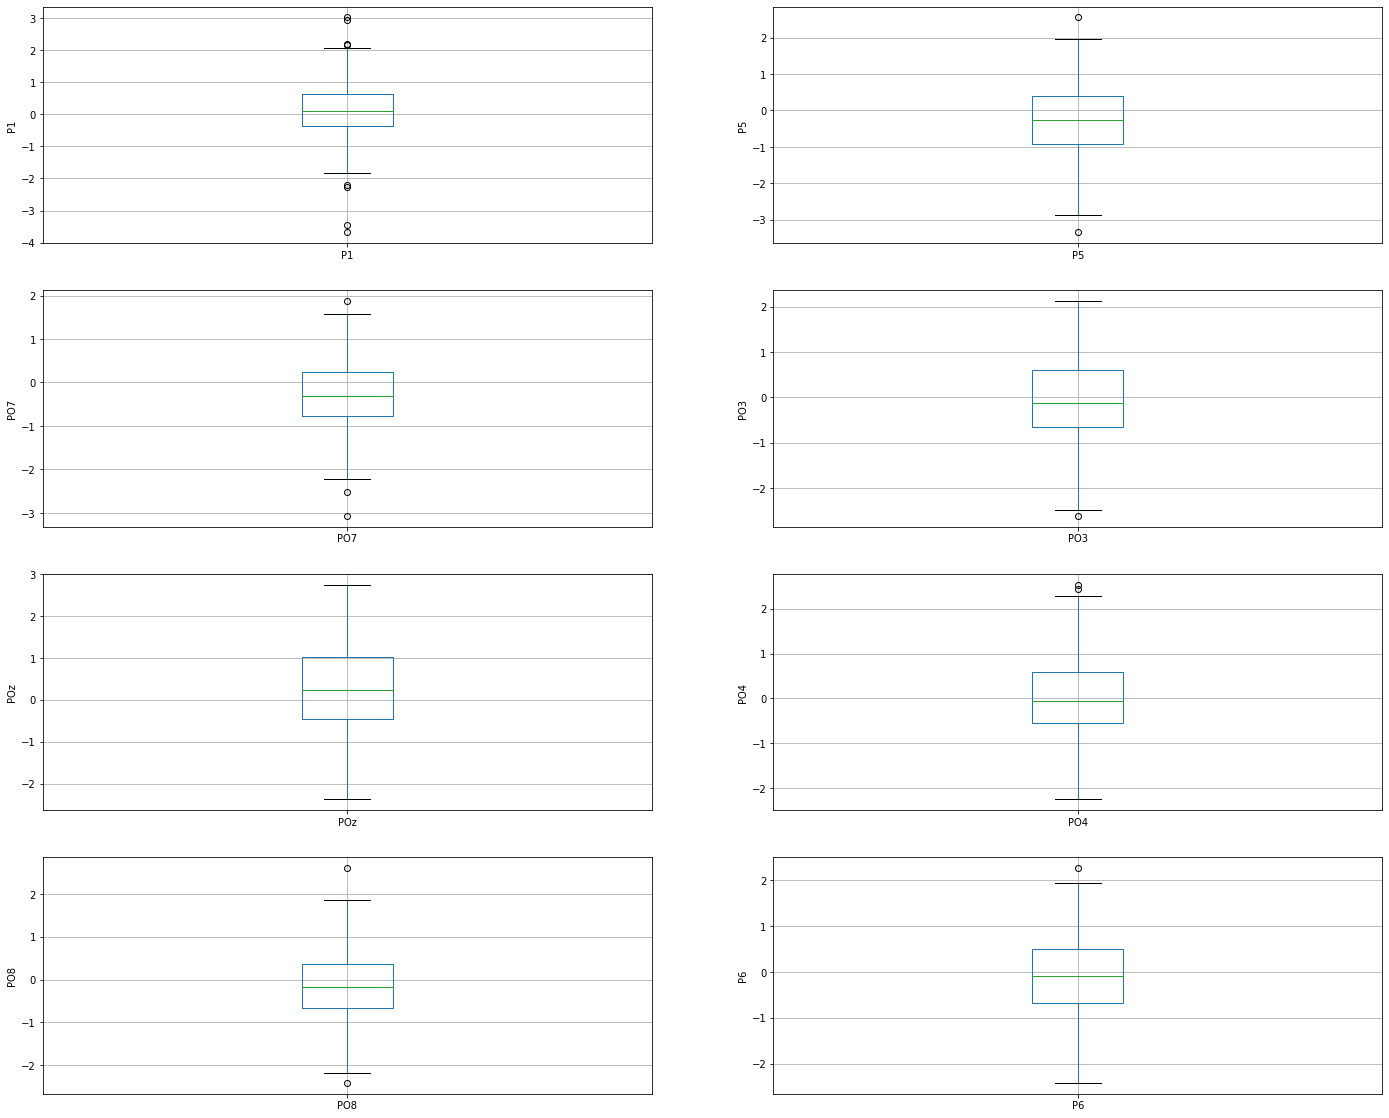

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='P1')
fig.set_title('')
fig.set_ylabel('P1')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='P5')
fig.set_title('')
fig.set_ylabel('P5')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='PO7')
fig.set_title('')
fig.set_ylabel('PO7')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='PO3')
fig.set_title('')
fig.set_ylabel('PO3')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='POz')
fig.set_title('')
fig.set_ylabel('POz')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='PO4')
fig.set_title('')
fig.set_ylabel('PO4')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='PO8')
fig.set_title('')
fig.set_ylabel('PO8')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='P6')
fig.set_title('')
fig.set_ylabel('P6')



Text(0, 0.5, 'P2')

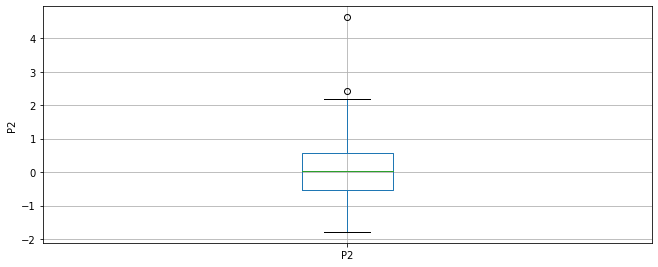

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='P2')
fig.set_title('')
fig.set_ylabel('P2')

Text(0, 0.5, 'Label')

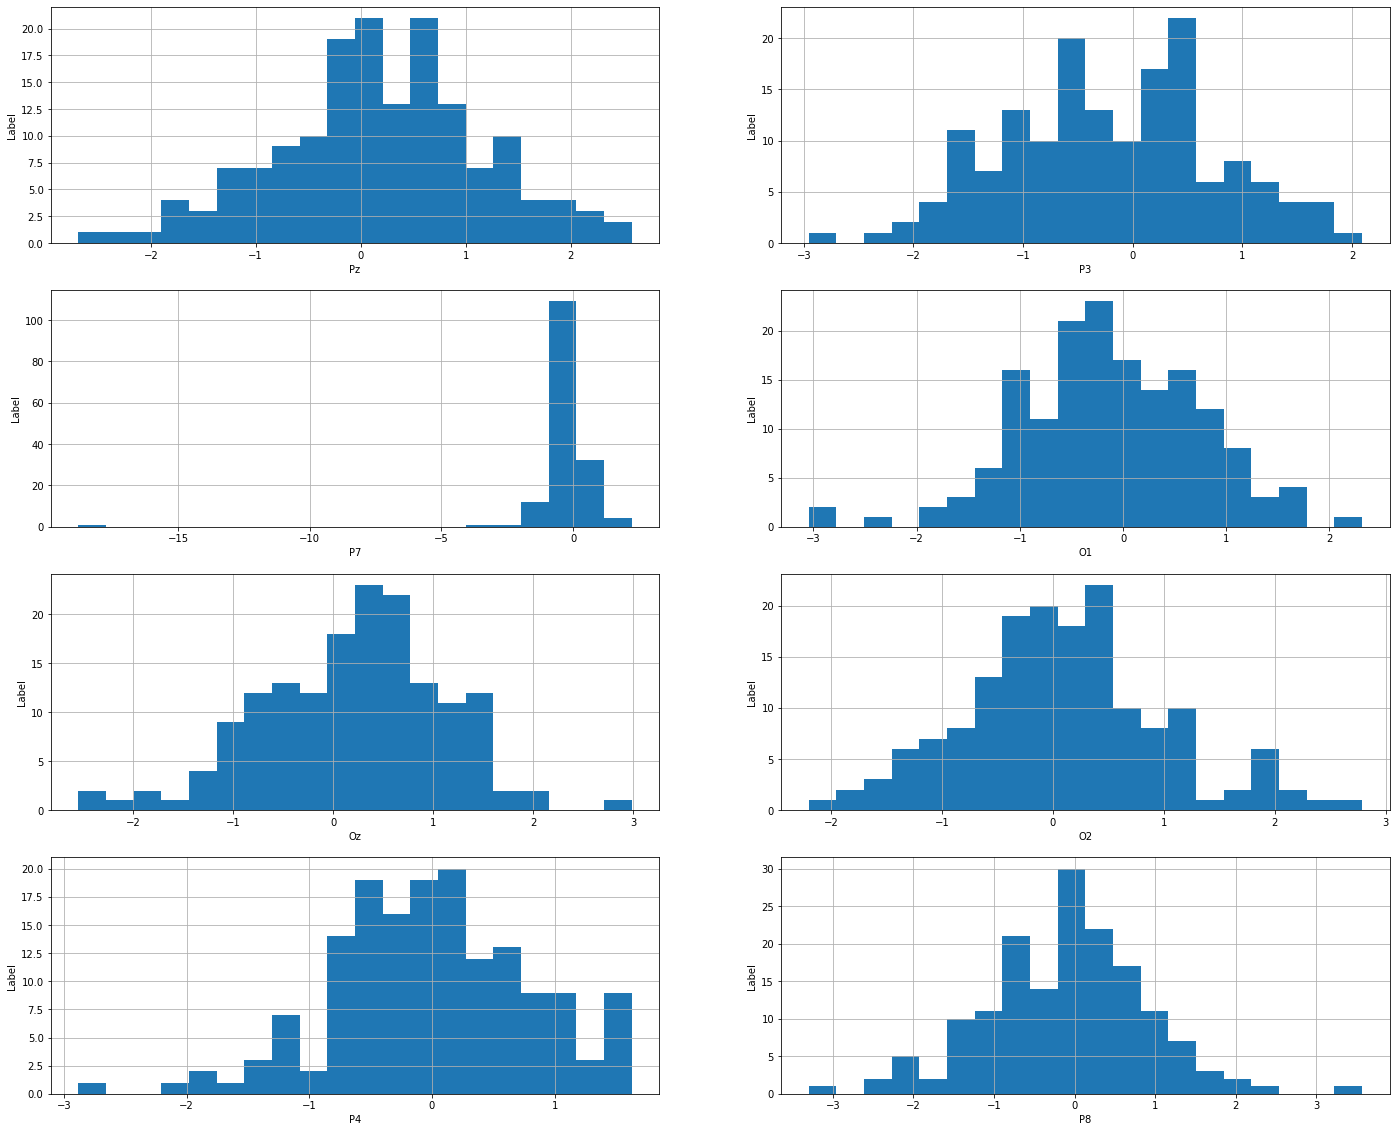

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Pz'].hist(bins=20)
fig.set_xlabel('Pz')
fig.set_ylabel('Label')

plt.subplot(4, 2, 2)
fig = df['P3'].hist(bins=20)
fig.set_xlabel('P3')
fig.set_ylabel('Label')

plt.subplot(4, 2, 3)
fig = df['P7'].hist(bins=20)
fig.set_xlabel('P7')
fig.set_ylabel('Label')

plt.subplot(4, 2, 4)
fig = df['O1'].hist(bins=20)
fig.set_xlabel('O1')
fig.set_ylabel('Label')

plt.subplot(4, 2, 5)
fig = df['Oz'].hist(bins=20)
fig.set_xlabel('Oz')
fig.set_ylabel('Label')

plt.subplot(4, 2, 6)
fig = df['O2'].hist(bins=20)
fig.set_xlabel('O2')
fig.set_ylabel('Label')

plt.subplot(4, 2, 7)
fig = df['P4'].hist(bins=20)
fig.set_xlabel('P4')
fig.set_ylabel('Label')

plt.subplot(4, 2, 8)
fig = df['P8'].hist(bins=20)
fig.set_xlabel('P8')
fig.set_ylabel('Label')

Text(0, 0.5, 'Label')

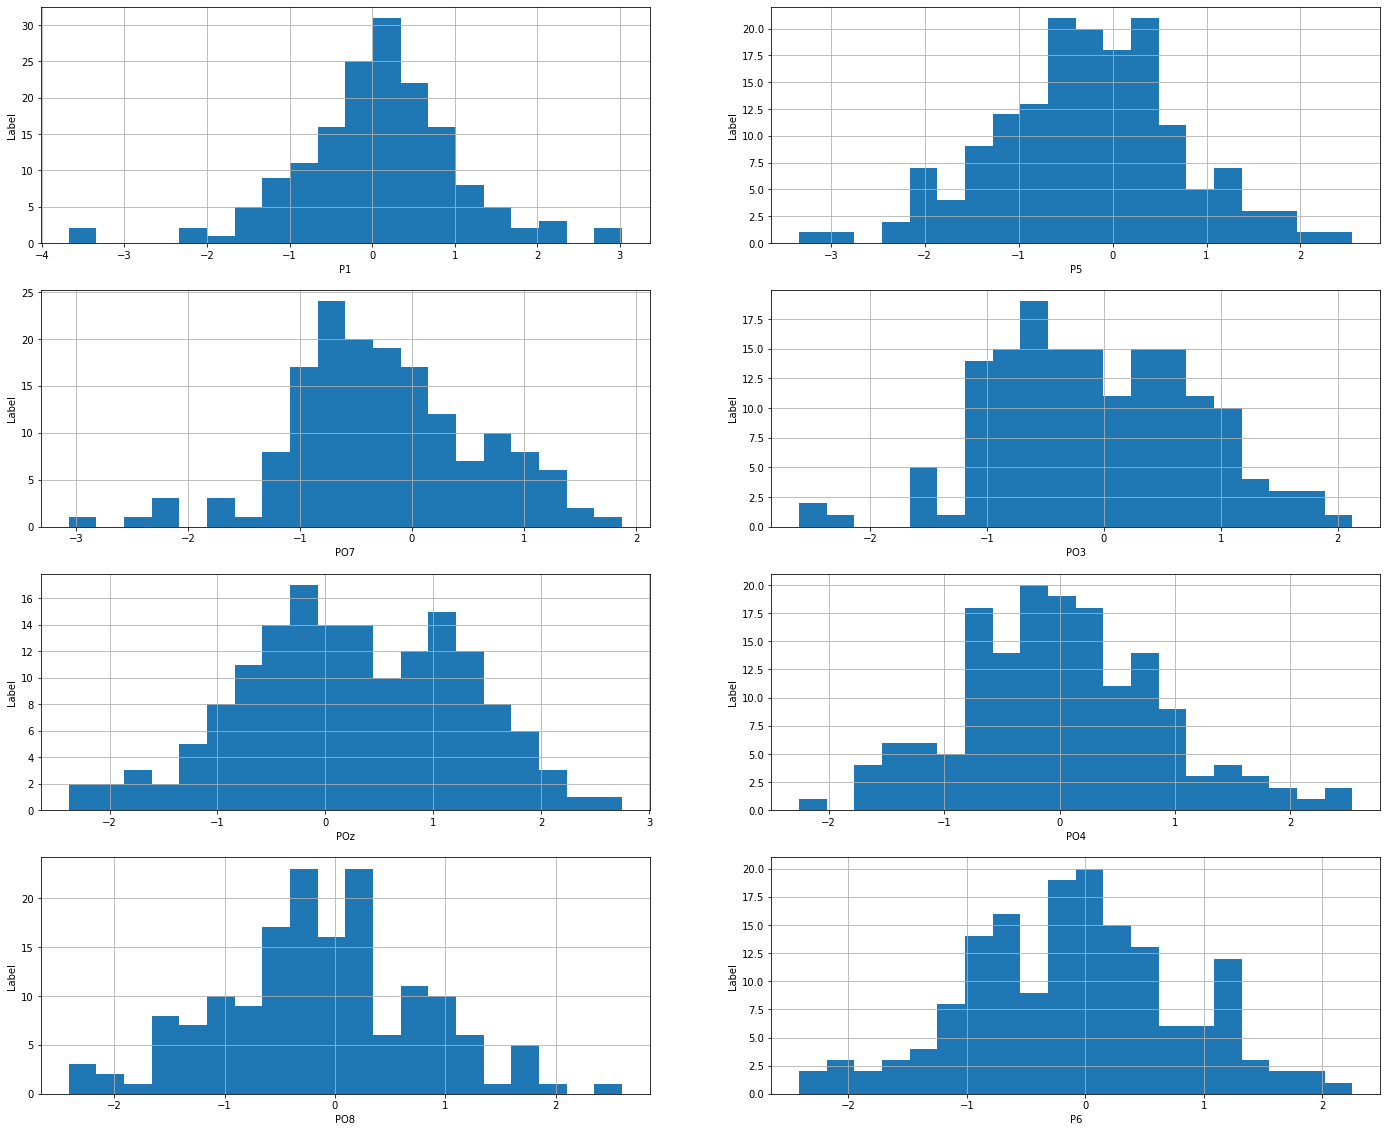

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['P1'].hist(bins=20)
fig.set_xlabel('P1')
fig.set_ylabel('Label')

plt.subplot(4, 2, 2)
fig = df['P5'].hist(bins=20)
fig.set_xlabel('P5')
fig.set_ylabel('Label')

plt.subplot(4, 2, 3)
fig = df['PO7'].hist(bins=20)
fig.set_xlabel('PO7')
fig.set_ylabel('Label')

plt.subplot(4, 2, 4)
fig = df['PO3'].hist(bins=20)
fig.set_xlabel('PO3')
fig.set_ylabel('Label')

plt.subplot(4, 2, 5)
fig = df['POz'].hist(bins=20)
fig.set_xlabel('POz')
fig.set_ylabel('Label')

plt.subplot(4, 2, 6)
fig = df['PO4'].hist(bins=20)
fig.set_xlabel('PO4')
fig.set_ylabel('Label')

plt.subplot(4, 2, 7)
fig = df['PO8'].hist(bins=20)
fig.set_xlabel('PO8')
fig.set_ylabel('Label')

plt.subplot(4, 2, 8)
fig = df['P6'].hist(bins=20)
fig.set_xlabel('P6')
fig.set_ylabel('Label')

Text(0, 0.5, 'Label')

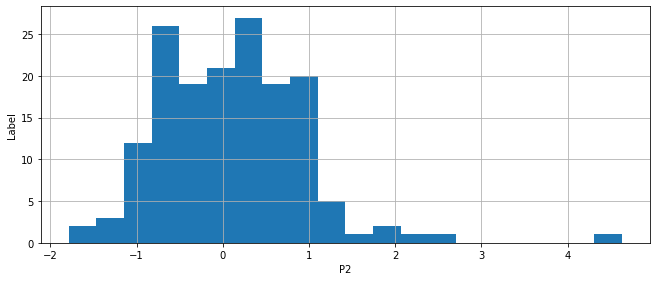

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['P2'].hist(bins=20)
fig.set_xlabel('P2')
fig.set_ylabel('Label')

In [ ]:
X = df.drop(['label'], axis=1)

y = df['label']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((128, 17), (32, 17))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2
count,1.280000e+02,1.280000e+02,128.000000,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,128.000000,1.280000e+02,1.280000e+02
mean,2.775558e-17,6.938894e-18,0.000000,6.938894e-18,3.469447e-18,2.688821e-17,2.775558e-17,2.775558e-17,6.938894e-18,1.734723e-17,-2.775558e-17,6.938894e-18,-8.673617e-18,1.387779e-17,0.000000,-1.387779e-17,-2.081668e-17
std,1.003929e+00,1.003929e+00,1.003929,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929,1.003929e+00,1.003929e+00
min,-2.714182e+00,-2.220850e+00,-10.557883,-3.478305e+00,-2.926350e+00,-2.616023e+00,-2.860746e+00,-3.066384e+00,-2.679879e+00,-2.599591e+00,-3.347672e+00,-2.927359e+00,-2.526852e+00,-2.707239e+00,-2.448058,-2.569180e+00,-2.469858e+00
25%,-4.636647e-01,-7.352863e-01,0.002171,-5.730989e-01,-7.090198e-01,-6.495179e-01,-7.021974e-01,-5.864747e-01,-5.609355e-01,-6.301241e-01,-6.151813e-01,-6.642132e-01,-7.465180e-01,-6.518718e-01,-0.596493,-6.898951e-01,-7.453406e-01
50%,-3.660352e-02,-4.242945e-02,0.135426,-1.014167e-01,5.832258e-02,-8.580765e-02,-7.628646e-02,3.155971e-02,9.033626e-03,6.653595e-03,-1.035140e-01,-1.010024e-01,-5.171977e-02,-7.552282e-02,-0.042955,-5.993180e-02,-2.124054e-02
75%,5.954260e-01,7.243340e-01,0.220780,7.775353e-01,7.201083e-01,5.230958e-01,6.100247e-01,6.414534e-01,5.654113e-01,6.896960e-01,6.158272e-01,7.358379e-01,7.954426e-01,6.543152e-01,0.532728,6.584016e-01,7.302669e-01
max,2.436902e+00,2.534221e+00,1.146052,2.822643e+00,2.914856e+00,2.913849e+00,2.120580e+00,3.505540e+00,3.157897e+00,2.980466e+00,2.540351e+00,2.519706e+00,2.400697e+00,2.845898e+00,2.872391,2.588750e+00,3.039555e+00


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.3125


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.3125


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.3125


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.0938


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.1875


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.2188


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array(['Biscuit', 'Drink', 'Toilet', 'Drink', 'Drink', 'Bed', 'Drink',
       'Bed', 'Toilet', 'Biscuit', 'Biscuit', 'Bed', 'Biscuit', 'Bed',
       'Toilet', 'Toilet', 'Bed', 'Drink', 'Bed', 'Bed', 'Bed', 'Toilet',
       'Drink', 'Drink', 'Toilet', 'Bed', 'Toilet', 'Drink', 'Drink',
       'Biscuit', 'Bed', 'Toilet', 'Drink', 'Toilet', 'Toilet', 'Toilet',
       'Drink', 'Toilet', 'Biscuit', 'Biscuit', 'Bed', 'Toilet',
       'Biscuit', 'Toilet', 'Toilet', 'Biscuit', 'Biscuit', 'Biscuit',
       'Drink', 'Toilet', 'Biscuit', 'Bed', 'Bed', 'Drink', 'Toilet',
       'Bed', 'Toilet', 'Drink', 'Drink', 'Drink', 'Bed', 'Biscuit',
       'Biscuit', 'Drink', 'Bed', 'Bed', 'Bed', 'Toilet', 'Bed', 'Bed',
       'Toilet', 'Bed', 'Biscuit', 'Bed', 'Toilet', 'Bed', 'Bed', 'Bed',
       'Biscuit', 'Biscuit', 'Toilet', 'Toilet', 'Biscuit', 'Bed',
       'Biscuit', 'Toilet', 'Toilet', 'Toilet', 'Toilet', 'Toilet', 'Bed',
       'Biscuit', 'Toilet', 'Bed', 'Biscuit', 'Drink', 'Toilet', 'Bed',
      

In [ ]:
print('SVM Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

SVM Training-set accuracy score: 0.5781


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.5781
Test set score: 0.0938


In [ ]:
# check class distribution in test set

y_test.value_counts()

Bed        10
Biscuit     9
Drink       7
Toilet      6
Name: label, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (12/(12+92))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.1154


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.1875


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.2500


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.2188


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.1875


In [ ]:
no# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1 4 3 2]
 [0 1 7 1]
 [2 1 0 4]
 [1 2 2 1]]

True Positives(TP) =  1

True Negatives(TN) =  1

False Positives(FP) =  4

False Negatives(FN) =  0


In [ ]:
from sklearn.metrics import classification_report

print("Using SVM")
print(classification_report(y_test, y_pred_test))

Using SVM
              precision    recall  f1-score   support

         Bed       0.25      0.10      0.14        10
     Biscuit       0.12      0.11      0.12         9
       Drink       0.00      0.00      0.00         7
      Toilet       0.12      0.17      0.14         6

    accuracy                           0.09        32
   macro avg       0.12      0.09      0.10        32
weighted avg       0.14      0.09      0.10        32

